# Markov Chain Monte Carlo Simulation

In [104]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.stats import pearsonr
import scipy.integrate as integrate

In [105]:
# Numerator of the target distribution
def f(x): 
    if x >= 1:
        return np.exp(-(x-1)/2) + np.exp(-(x-1)**2)
    else: 
        return np.exp((x-1)/3) + np.exp((x-1)**3)

In [107]:
# Normal Probability Distribution Function
def g(x, mu, sigma): 
    return 1/np.sqrt(2*np.pi)/sigma * np.exp(-0.5*((x-mu)/sigma)**2)

## Draw Target Distribution 

In [108]:
def int1(x):
    return np.exp(-(x-1)/2) + np.exp(-(x-1)**2)

def int2(x):
    return np.exp((x-1)/3) + np.exp((x-1)**3)

T_NORM_CONST = integrate.quad(lambda x: int1(x), 0, np.inf) + integrate.quad(lambda x: int2(x), -np.inf, 0)
NORM_CONST = T_NORM_CONST[0] + T_NORM_CONST[1] + T_NORM_CONST[2] + T_NORM_CONST[3] 
print('NORM_CONST = ', NORM_CONST)

NORM_CONST =  7.165555931394348


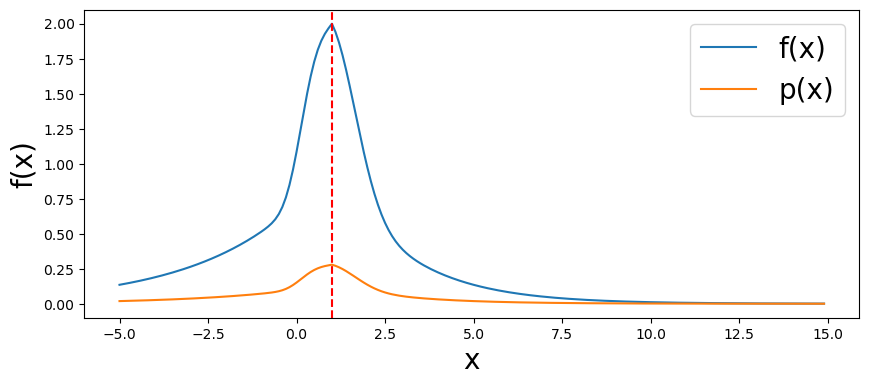

In [109]:
x_vals = np.arange(-5,15,.1)
f_vals = [f(x) for x in x_vals]
p_vals = [f/NORM_CONST for f in f_vals]

plt.figure(figsize=(10,4))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, p_vals)
plt.legend(['f(x)', 'p(x)'], fontsize=20)
plt.xlabel('x', fontsize=20)
plt.ylabel('f(x)', fontsize=20)
plt.axvline(1, color='r', linestyle='--')

In [110]:
TRUE_EXP = 1.94709 / NORM_CONST
print(TRUE_EXP)

0.2717290910352458


## Case 1: Rejection Sampling with N(0, 3)

Text(0.5, 1.0, 'M = 1000')

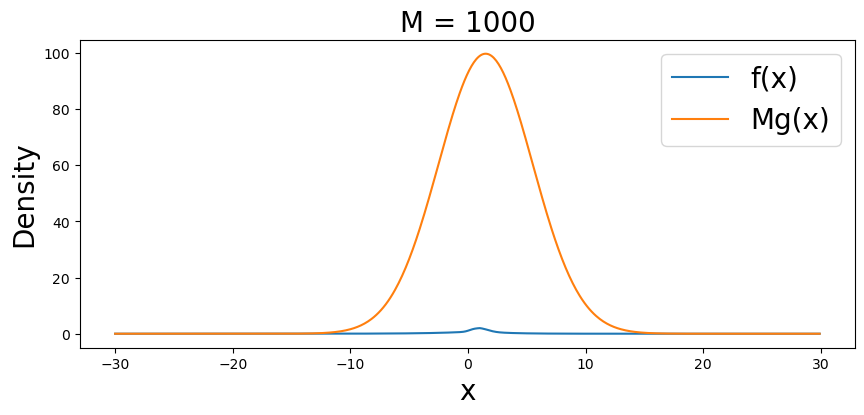

In [111]:
x_vals = np.arange(-30,30,.1)
f_vals = [f(x) for x in x_vals]
g_vals = g(x_vals, 1.5, 4)
M = 1000

plt.figure(figsize=(10,4))
plt.plot(x_vals, f_vals)
plt.plot(x_vals, M*g_vals)
plt.xlabel('x', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.legend(['f(x)', 'Mg(x)'], fontsize=20)
plt.title("M = %s"%M, fontsize=20)

In [112]:
# sample space
samples = []

# no. of samples wanted 
N = 1000000

for _ in range(N): 
    # sampling from normal distribution
    k = np.random.normal(0,3)
    
    # acceptance probability 
    prob_accept = f(k) / (M*g(k, 0, 3))
    
    if np.random.random() < prob_accept: 
        samples.append(k)
        
print("Number of samples collected: %s"%len(samples))

Number of samples collected: 6799


In [113]:
print("Efficiency: %s"%round(len(samples)/N, 3))

Efficiency: 0.007


Text(0.5, 1.0, 'Empirical Exp. Value: 0.31\nTrue Exp. Value: 0.27')

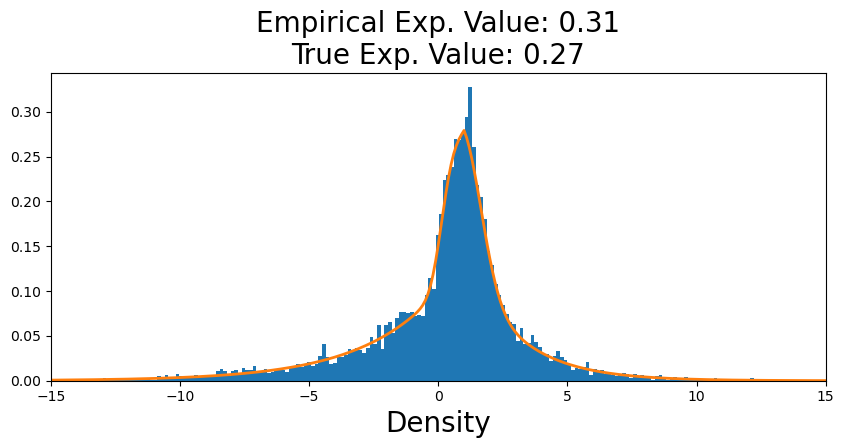

In [114]:
plt.figure(figsize=(10,4))
plt.hist(samples, bins=200, density=True)
plt.xlabel('x', fontsize=20)
plt.xlabel('Density', fontsize=20)
plt.plot(x_vals, [f/NORM_CONST for f in f_vals], linewidth=2)
plt.xlim(-15,15)
plt.title('Empirical Exp. Value: %s\nTrue Exp. Value: %s'%(round(np.mean(samples), 2), round(np.mean(TRUE_EXP), 2)), fontsize=20)

Text(0.5, 1.0, 'Correlation: -0.0')

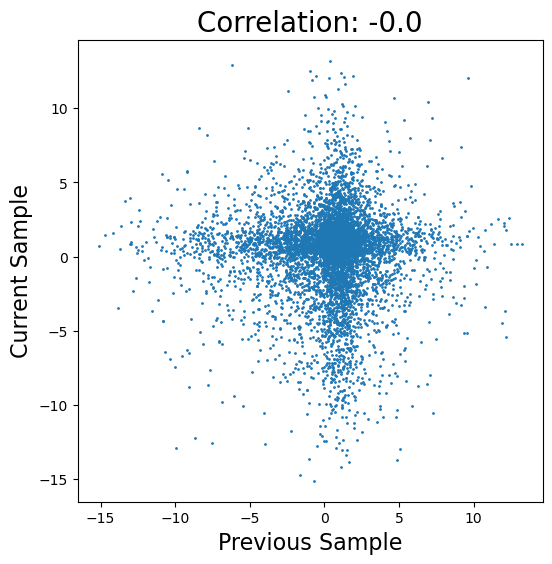

In [115]:
plt.figure(figsize=(6,6))
plt.scatter(samples[:-1], samples[1:], s=1)
plt.xlabel('Previous Sample', fontsize=16)
plt.ylabel('Current Sample', fontsize=16)
corr = round(pearsonr(samples[:-1], samples[1:])[0], 2)
plt.title('Correlation: %s'%corr, fontsize=20)

## Case 2: Metropolis Algorithm with N($x_{prev}$, 4) 

In [116]:
samples = [1]
num_accept = 0
for _ in range(N):
    # sampling from normal distribution
    c = np.random.normal(samples[-1], 4)
    
    # acceptance probability 
    if f(samples[-1]) != 0: prob = min(1, f(c)) / f(samples[-1])
    
    if np.random.random() < prob: 
        samples.append(c)
        num_accept += 1
    
    else: 
        samples.append(samples[-1])

In [117]:
burn_in = 1000 
retained_samples = samples[burn_in+1:]

In [118]:
print("No. of samples collected: %s"%len(retained_samples))

No. of samples collected: 999000


In [119]:
print("Efficiency: %s"%round(len(retained_samples)/N, 3))

Efficiency: 0.999


In [125]:
print("Fraction of acceptances: %s"%round(num_accept/N, 5))

Fraction of acceptances: 0.46075


Text(0.5, 1.0, 'Empirical Exp. Value: 0.28\nTrue Exp. Value: 0.27')

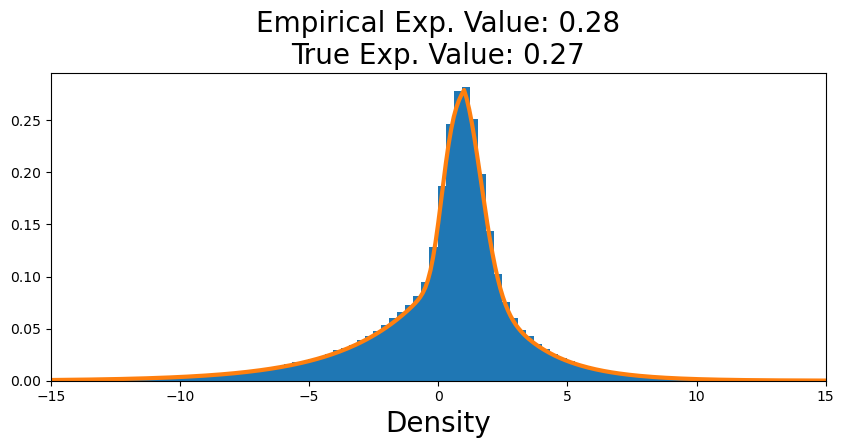

In [121]:
plt.figure(figsize=(10,4))
plt.hist(retained_samples, bins=200, density=True)
plt.xlabel('x', fontsize=20)
plt.xlabel('Density', fontsize=20)
plt.plot(x_vals, [f/NORM_CONST for f in f_vals], linewidth=3)
plt.xlim(-15,15)

plt.title('Empirical Exp. Value: %s\nTrue Exp. Value: %s'%(round(np.mean(retained_samples), 2), round(np.mean(TRUE_EXP), 2)), fontsize=20)

Text(0.5, 1.0, 'Correlation: 0.81')

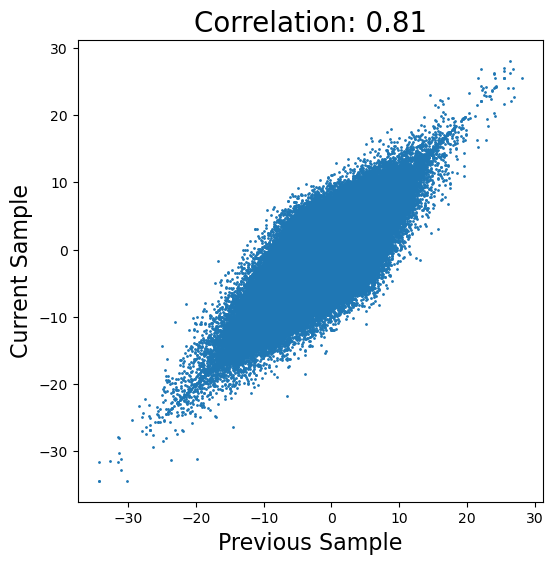

In [126]:
plt.figure(figsize=(6,6))
plt.scatter(retained_samples[:-1], retained_samples[1:], s=1)
plt.xlabel('Previous Sample', fontsize=16)
plt.ylabel('Current Sample', fontsize=16)
corr = round(pearsonr(samples[:-1], samples[1:])[0], 2)
plt.title('Correlation: %s'%corr, fontsize=20)